#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
from math import nan
from itertools import islice
import subprocess
import shutil
import os
import pdb


# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath('')).parent.parent)
sys.path.insert(0, nb_path)
print(f'Added {nb_path} to system path')

# This computer git repos
from project.project_manager_module import ProjectManager

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts/"
project = "FCN22"  
experiment = "Figure1CD"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Input context

In [3]:
input_folder = "../in" # Relative to experiment path
matlab_workspace_file = "matlab_workspace_SingleSpike.mat"
conn_skeleton_file_in = "Replica_skeleton_connections_20210211_1453238_L4_SS.gz"
conn_file_out = "connections_SingleSpike_ci.gz"
input_filename = "noise_210406_SingleSpike.mat"  
startpoint_csv_folder = "startpoint_csvs/LIF"

#### Data context for single files and arrays 
These startpoint and parameter strings are used only in this module.
The output_folder will be created under experiment

In [4]:
startpoint = "Comrad"  # HiFi, Comrad, Bacon
parameter = "noise"
output_folder = f"{startpoint}_{parameter}"

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [5]:
PM = ProjectManager(
    path=experiment_path,
    input_folder=input_folder,
    output_folder=output_folder,
    matlab_workspace_file=matlab_workspace_file,
    conn_skeleton_file_in=conn_skeleton_file_in,
    conn_file_out=conn_file_out,
    input_filename=input_filename,
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    project=project,
    experiment=experiment,
    startpoint_csv_folder=startpoint_csv_folder,
)

No to_mpa_dict in conf file. Only one file will be processed.


#### Copy Anat and Phys csv files from start point folder to path and update paths into the csv:s

In [6]:
anat_file_fullpath_out , phys_file_fullpath_out = PM.prepare_csvs_for_simulation()

#### Create necessary current injection files

In [7]:
PM.ct.create_current_injection(randomize=False)

Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\..\in\matlab_workspace_SingleSpike.mat
Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\..\in\noise_210406_SingleSpike.mat


#### Run CxSystem2 for single file

In [8]:
command_and_args = [
    "cxsystem2", 
    "-a", 
    str(anat_file_fullpath_out), 
    "-p", 
    str(phys_file_fullpath_out)
]

subprocess.run(command_and_args, text=True, encoding="utf-8")

CompletedProcess(args=['cxsystem2', '-a', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure1CD\\Anat_Comrad_221122_noise.csv', '-p', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure1CD\\Phys_Comrad_221122_noise.csv'], returncode=0)

### Analyze and visualize the results for single files

#### Show input and data. 
If  file_to_display = None, the function selects the most recent data file in output_folder.


Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\Comrad_noise\Comrad_noise_results_20221206_1350494.gz
Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\..\in\noise_210406_SingleSpike.mat


(0.2, 0.6)

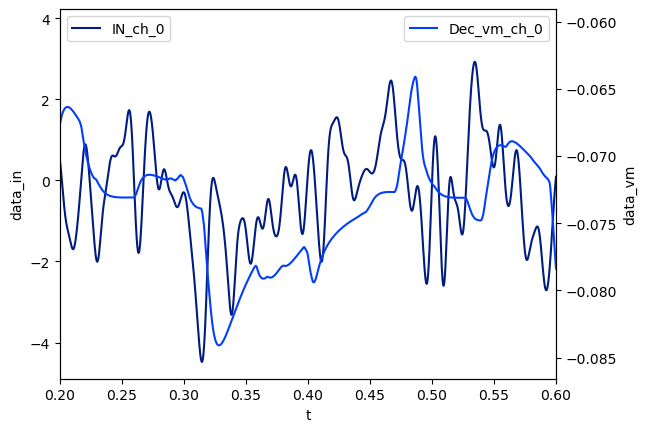

In [13]:
# file_to_display = r"[your/full/path/to/datafile].gz"  
file_to_display = None # Most recent

PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[0], 
    savefigname=''
)
plt.xlim((0.2, 0.6))

Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\Comrad_noise\Comrad_noise_results_20221206_1350494.gz
Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\..\in\noise_210406_SingleSpike.mat


(0.2, 0.6)

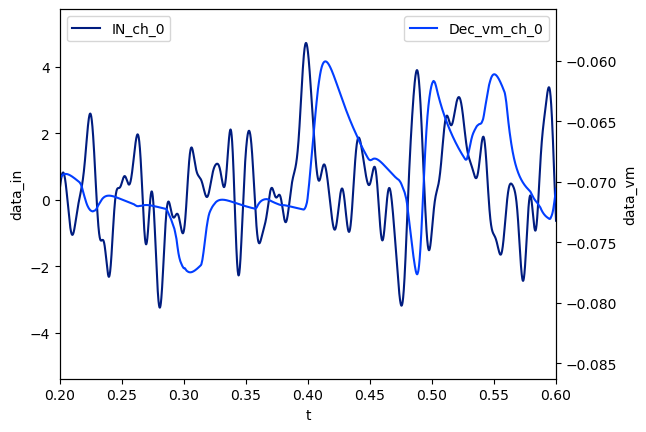

In [14]:
PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[1], 
    savefigname=''
)
plt.xlim((0.2, 0.6))

Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\Comrad_noise\Comrad_noise_results_20221206_1350494.gz
Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\..\in\noise_210406_SingleSpike.mat


(0.2, 0.6)

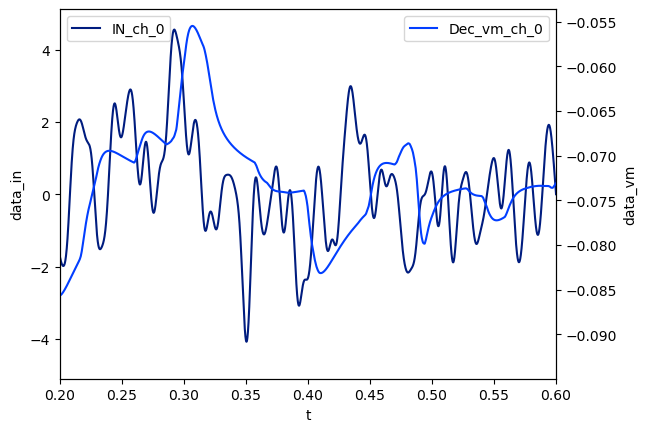

In [15]:
PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[2], 
    savefigname=''
)
plt.xlim((0.2, 0.6))

Loaded file C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure1CD\Comrad_noise\Comrad_noise_results_20221206_1350494.gz
['NG0_relay_vpm', 'NG1_L4_CI_SS_L4', 'NG2_L4_CI_BC_L4', 'NG3_L4_SS_L4']


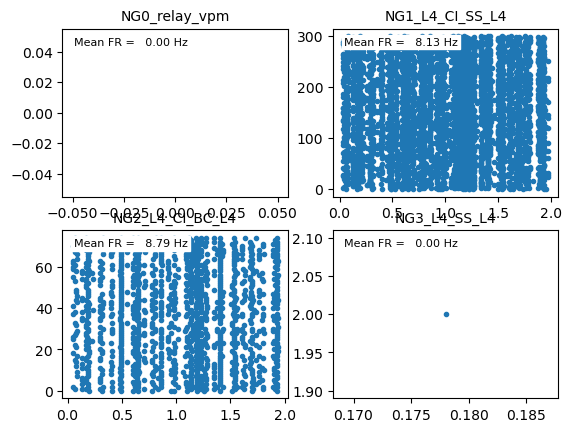

In [12]:
PM.viz.show_spikes(results_filename=file_to_display, savefigname="")